# APIs
This week we'll be discussing how to get and process data from the web with Application Programming Interfaces.

In [9]:
# This is old
import requests
import json
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

# These are new
import tweepy

# Load secret keys
#with open('api_keys.json-example') as f:
#    api_keys = json.loads(f.read())

## Example 1: Bitcoin
In this example, we'll go through the process of manually querying a Bitcoin API

* You can find the API documentation [here](https://blockchain.info/api)

In [10]:
# Getting exchange rates
# (A simple API with no necessary parameters)
r = requests.get('https://blockchain.info/ticker')
#print('status code: ' + str(r.status_code))
r.json()

{'AUD': {'15m': 8946.45,
  'buy': 8947.1,
  'last': 8946.45,
  'sell': 8945.79,
  'symbol': '$'},
 'BRL': {'15m': 22550.87,
  'buy': 22552.52,
  'last': 22550.87,
  'sell': 22549.22,
  'symbol': 'R$'},
 'CAD': {'15m': 8858.86,
  'buy': 8859.5,
  'last': 8858.86,
  'sell': 8858.21,
  'symbol': '$'},
 'CHF': {'15m': 6900.21,
  'buy': 6900.71,
  'last': 6900.21,
  'sell': 6899.7,
  'symbol': 'CHF'},
 'CLP': {'15m': 4390053.69,
  'buy': 4390374.92,
  'last': 4390053.69,
  'sell': 4389732.46,
  'symbol': '$'},
 'CNY': {'15m': 46429.46,
  'buy': 48049.78,
  'last': 46429.46,
  'sell': 44809.14,
  'symbol': '¥'},
 'DKK': {'15m': 44072.45,
  'buy': 44075.67,
  'last': 44072.45,
  'sell': 44069.22,
  'symbol': 'kr'},
 'EUR': {'15m': 5937.21,
  'buy': 5940.48,
  'last': 5937.21,
  'sell': 5933.94,
  'symbol': '€'},
 'GBP': {'15m': 5197.43,
  'buy': 5197.81,
  'last': 5197.43,
  'sell': 5197.05,
  'symbol': '£'},
 'HKD': {'15m': 53843.89,
  'buy': 53847.83,
  'last': 53843.89,
  'sell': 53839.95,

In [31]:
# A more complicated API request
# We can use a parameters dictionary to specify 'arguments' to the API
params = {
    'timespan': '1years',
    'rollingAverage': '1days'
}
#r = requests.get('https://api.blockchain.info/charts/market-price', params=params)
r = requests.get('https://api.blockchain.info/charts/transactions-per-second',params=params)
print(r.url)
data = r.json()
data

https://api.blockchain.info/charts/transactions-per-second?timespan=1years&rollingAverage=1days


{'description': 'The number of Bitcoin transactions added to the mempool per second.',
 'name': 'Transaction Rate',
 'period': 'minute',
 'status': 'ok',
 'unit': 'Transactions Per Second',
 'values': [{'x': 1477864260, 'y': 2.38},
  {'x': 1477884840, 'y': 2.4},
  {'x': 1477905420, 'y': 2.46},
  {'x': 1477926000, 'y': 2.61},
  {'x': 1477946580, 'y': 2.76},
  {'x': 1477967160, 'y': 2.8},
  {'x': 1477987740, 'y': 2.83},
  {'x': 1478008320, 'y': 2.84},
  {'x': 1478028900, 'y': 2.85},
  {'x': 1478049480, 'y': 2.87},
  {'x': 1478070060, 'y': 2.87},
  {'x': 1478090640, 'y': 2.91},
  {'x': 1478111220, 'y': 2.99},
  {'x': 1478131800, 'y': 3.08},
  {'x': 1478152380, 'y': 3.14},
  {'x': 1478172960, 'y': 3.12},
  {'x': 1478193540, 'y': 3.12},
  {'x': 1478214120, 'y': 3.1},
  {'x': 1478234700, 'y': 3.1},
  {'x': 1478255280, 'y': 3.06},
  {'x': 1478275860, 'y': 3.01},
  {'x': 1478296440, 'y': 2.93},
  {'x': 1478317020, 'y': 2.88},
  {'x': 1478337600, 'y': 2.82},
  {'x': 1478358180, 'y': 2.71},
  {'

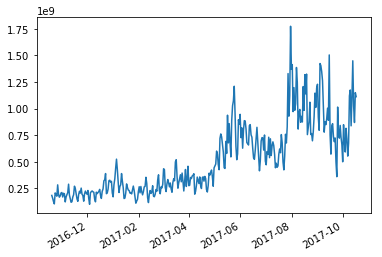

In [11]:
x_values = [datetime.fromtimestamp(t['x']) for t in data['values']]
y_values = [t['y'] for t in data['values']]

fig, ax = plt.subplots()
ax.plot(x_values, y_values)
fig.autofmt_xdate()

## Example 2: Dictionary API (with API key)
* You can read about the DictionaryAPI [here](http://www.dictionaryapi.com/)

In [49]:
with open('api_keys.json-dictionary') as f:
    api_keys = json.loads(f.read())

# We can write a simple API wrapper function to make using the API easier in the future
def word_definitions(word):
    # Here we'll load in our api key
    params = {
        'key': api_keys['consumer_key']
    }
    # Constructing the full URL
    url = 'http://www.dictionaryapi.com/api/v1/references/collegiate/xml/' + word
    
    # Passing parameters into the request and executing it
    r = requests.get(url, params=params)
    
    # Using BeautifulSoup to parse the XML response (ew, XML...)
    soup = BeautifulSoup(r.text, 'xml')
    #print(params)
    # Scrape defns from the response
    defs = []
    for e in soup.find_all('entry'):
        defs.append(e.find('dt').text)
    return defs

print("Soup:")
print('\n'.join(word_definitions('soup')))

print("\nDank:") 
print('\n'.join(word_definitions('dank')))


Soup:
:a liquid food especially with a meat, fish, or vegetable stock as a base and often containing pieces of solid food
:a soup that is offered by a restaurant on a particular day
:an establishment dispensing minimum dietary essentials (as soup and bread) to the needy
:to increase the power or efficiency of soup up an engine
:a hodgepodge especially of initials (as of the names of organizations)
:a soup made with the nest of a swiftlet (especially Collocalia fuciphaga) that builds it using a glutinous secretion from its salivary glands
:something easy to do
:a soup made of meat (as calf's head or veal), wine, and spices in imitation of green turtle soup
:a thick purée made of dried peas
:a mixture of organic molecules in evolutionary theory from which life on earth originated

Dank:
:unpleasantly moist or wet a dank basement


## Example 3: Twitter with Tweepy
In this example, we'll show an example of accessing an API with a Python wrapper.

* You can read the Tweepy documentation [here](https://tweepy.readthedocs.io/)
* Get an API key by making an app [here](https://apps.twitter.com/)

In [11]:
# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']

# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [12]:
# Do magic
elon = api.get_user('elonmusk')
print('elon is followed by: ' + str(elon.followers_count))
print('elon follows: ' + str(elon.friends_count))

elon is followed by: 14177333
elon follows: 47


In [13]:
elon_tweets = api.user_timeline('elonmusk', count=10)
for t in elon_tweets:
    print(t.text + '\n')
    

RT @SpaceX: Falcon 9 and Koreasat-5A went vertical last night on Pad 39A. Today’s launch window opens at 3:34 p.m. EDT → https://t.co/gtC39…

@uncover007 500 ft so far. Should be 2 miles long in three or four months and hopefully stretch the whole 405 N-S c… https://t.co/BfoqYKJg3u

Picture of The Boring Company LA tunnel taken yesterday https://t.co/TfdVKyXFsJ

Btw, just want to express a word of appreciation for the hard work of the Tesla Gigafactory team. Reason I camped o… https://t.co/Nztp84BSLW

Whiskey, fire, s’mores and JC

Also, hotdog or not hotdog? https://t.co/86cxwbZyWB

Campfire on the Gigafactory roof https://t.co/JKxaKUzvZY

Just feed it The Godfather movies as input. What’s the worst that could happen? https://t.co/WX4Kx45csv

RT @Tesla: Hospital del Niño is first of many solar+storage projects going live. Grateful to support the recovery of Puerto Rico with @rica…

@lorengrush @verge It’s true tho

@verge Groan



In [39]:
# We can also send data to Twitter using Tweepy
tweet = api.update_status("I'm teaching a lecture on APIs. Here's a tweet.")
print(tweet.id)
print(tweet.text)
print(tweet.created_at)


925120705800425472
I'm teaching a lecture on APIs. Here's a tweet.
2017-10-30 22:02:18


In [40]:
# Streaming tweets is a great way of capturing lots of data
# (You can get around the limits of Twitter searching)

# Step 1) We need to create a class that will handle when we get new Tweets
class MyStreamListener(tweepy.StreamListener):
    
    # This method will be called when new tweets come in
    def on_status(self, status):
        print(status.text)

# Step 2) We need to setup a stream and tell Tweepy to send Tweets to our listener
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

# Step 3) Turn on the Tweet Stream and track a particular phrase.
myStream.filter(track=[u'pizza'], async=False)
        

RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
RT @SomosSarcasmo: Cuando veo pizza. https://t.co/5RnvLhTel8
don't underestimate the power of cheese pizza!
RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
RT @felipeneto: Muita pizza, hamburgues, japonês, chocolate todos os dias e um molho especial #MPN #FelipeNeto https://t.co/i0vE9bLlnB
Veo 2x1 de cuarto de libra, copa ana, y de pizza en sammys 💔 nos fuimossss
@Sarasbp De que es la pizza de eso depende si ganas o no.
RT @lebaenesepapi: Pineapple and non-pineapple pizza eaters must put our differences aside and join forces to defeat this evil https://t.co…
comer pizza com a mao e melhor q comer com garfo e faca, boa

KeyboardInterrupt: 

# Challenges!
**NOTE:** This week's challenges aren't too difficult to implement, but it may be difficult to understand _how_ to implement them. This is intentional. A very important skill in working with APIs is learning how to read and understand the documentation that is provided with them. These challenges will try to help you develope that skillset.

### Challenge 1: Bitcoin Price over time
Write a function that queries the Blockchain API (Example 1) and graphs the USD Market Price of Bitcoin over the last year.
It may be helpful to look at the [Blockchain Charts API documentation](https://blockchain.info/api/charts_api)

/home/yabo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


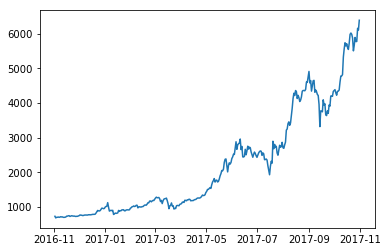

In [2]:
def bitcoin_price():
    params = {
        "timespan":"1years",
        "rollingaverage":"1days"
    }
    r = requests.get('https://api.blockchain.info/charts/market-price', params=params)
    #print(r.url)
    data = r.json()
    x_values = [datetime.fromtimestamp(t['x'])for t in data['values']]
    y_values = [t['y']for t in data['values']]
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values)
    fig.show()
bitcoin_price()

### Challenge 2: Creator of Liked Tweets
Given a user, write a function that will return a list of the users that wrote the last 100 tweets that the input user has liked.

**Note:** You'll need a set of Twitter credentials to complete this challenge. (Just make a throwaway account, and create an app at https://apps.twitter.com/ to get your set of API credentials)


In [14]:
with open('api_keys.json-tweeter') as f:
    api_keys = json.loads(f.read())

# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']

# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def liked_tweet_creators(user):
    #print("Here is " + user + "'s " + "favorities: ")
    ret = ["Here is " + user + "'s " + "favorities: "]
    for like in api.favorites(user,count=100):
        ret.append(like.author.screen_name)
        #print(like.author.screen_name + ": " + like.author.id_str)
    return ret
#liked_tweet_creators('Tyler')
#liked_tweet_creators('Ben')

In [15]:
liked_tweet_creators('kennethreitz') # Author of requests

["Here is kennethreitz's favorities: ",
 'samuelclay',
 'chrisheithoff',
 'crc',
 'PeterSanchez',
 'larrypolk',
 'Djiit',
 'hiimtaylorjones',
 'offby1',
 'sarangbk',
 'Gulopine',
 'offby1',
 'dbader_org',
 'zoocat',
 'mitsuhiko',
 'Ocramius',
 'gekitsuu',
 'dbader_org',
 'gekitsuu',
 'vonorm_',
 'supercub666',
 'shimst3r',
 'neirbowj',
 'gamesbrainiac',
 'tef_ebooks',
 'Big_in_VA',
 'tartley',
 'quinnnorton',
 'brianokken',
 'brianokken',
 'byt3bl33d3r',
 'NickBruun',
 'pk11112999',
 'webology',
 'PaulM',
 'dzuelke',
 'devsupportman',
 'mitsuhiko',
 'rusin',
 'hiSaugat',
 'nerdgineerx',
 'sharmavishwas7',
 'wemake_services',
 'erinxocon',
 'Vees_Dad',
 'leahculver',
 'chrisjrn',
 'grmpyprogrammer',
 'holdenweb',
 'holdenweb',
 'shimst3r',
 'cedwardsmedia',
 'ewilazarus',
 'DaddyOh',
 'clickdroid',
 'melbacoast',
 'eddie_pete',
 'adhaamehab',
 'vsupalov',
 '_as_a_service',
 '7d1',
 '__olamilekan__',
 'jdorfman',
 'j00bar',
 'nahiable',
 'ramalhoorg',
 'Vees_Dad',
 '__olamilekan__',
 'no

In [18]:
liked_tweet_creators('mitsuhiko') # Author of Flask

["Here is mitsuhiko's favorities: ",
 'Lazer',
 'mattrobenolt',
 'LukasFittl',
 'thomasfuchs',
 'thomasfuchs',
 'thomasfuchs',
 'georg_renner',
 'SethEverman',
 'a_nnaschneider',
 'terrorobe',
 'danielarber',
 'georg_renner',
 'williampietri',
 'pydanny',
 'puzzledpeaces',
 'DynamicWebPaige',
 'Lazer',
 'moritzplassnig',
 'RobertHarm',
 'pbergsen',
 'CNN',
 'rguillebert',
 'peggyrayzis',
 'a_nnaschneider',
 'NikoAlm',
 'NikoAlm',
 'michlbrmly',
 'georg_renner',
 'MevluetK',
 'thomas_mohr',
 'okonetchnikov',
 'maxschrems',
 'karlamov',
 'monikaturyna',
 'avrong',
 'maxschrems',
 'moser_at',
 'moser_at',
 'dieGamon',
 'rudifussi',
 'maxschrems',
 'MacLemon',
 'IrmgardGriss',
 'chrismaddern',
 'dieGamon',
 'matstrolz',
 'dhh',
 'mauerfallkind',
 'wycats',
 'OliverScheiber1',
 'zeeg',
 'moser_at',
 'joseflentsch',
 'janboehm',
 'cyclingtiger',
 'LeopoldStammler',
 'FBoschek',
 'dieGamon',
 'terrorobe',
 'sosmitmensch',
 'neos_eu',
 'Plapperbaer',
 'matstrolz',
 'w_nina',
 'FPrettenthaler',

### Challenge 3: Stream Saver

Write a function, or set of functions, that takes as an argument a list of search terms and opens a Tweet stream with those search terms. The function should filter out any tweets that are retweets of other tweets, and should filter out any tweets that are `@` replies to other users (the only tweets that we care about are 'original' tweets). As each tweet comes in, append it to a `csv` file specified by `filename` (Note, you have to create this file if it doesn't exist)

For each tweet, save the following information:
* Tweet content (text)
* The user that wrote the tweet
* When the tweet was created
* The 'tweet id' of the tweet

(See Challange 2 for note about Twitter Credentials)

#### Implement with Cursor

In [16]:
def stream_saver(search_terms):
    readyToWrite = []
    for s in tweepy.Cursor(api.search, q=search_terms).items(100):
        if s.in_reply_to_status_id == None and s.entities['user_mentions'] == []:
            #print(s.text)
            #t = s.text
            #print(s.id)
            #print(s.created_at)
            #print(s.user.id)
            #print(s.user.screen_name)
            readyToWrite.append({
                'tweetContent':s.text,
                'tweetUser':s.user.screen_name,
                'tweetTime':s.created_at,
                'tweetID':s.id
            })
    readyToWrite_df = pd.DataFrame(readyToWrite)
    readyToWrite_df.to_csv('test.csv')
    return readyToWrite_df
stream_saver('hot')

,tweetContent,tweetID,tweetTime,tweetUser
0,كويتيه قحبه سكرانه ترقص وتدلع وينكها..https://...,925974283255365632,2017-11-02 06:34:07,staskupriianov4
1,या प्रसिद्ध अभिनेत्रीचा पूर्व प्रियकर करणार बॉ...,925974279543455744,2017-11-02 06:34:06,cnxmasti
2,القحبه مع الفحل الاسود ونيك في بقها وينيكها في...,925974276678832128,2017-11-02 06:34:05,aleksandrmalik3
3,قحبتين يغروه ويخلوه ينيكهم علشان ما يحجز علي ا...,925974275676192769,2017-11-02 06:34:05,AnnaMakarova832
4,I need to meet boys ➽ https://t.co/Y0B8DfhuDp ...,925974273512091648,2017-11-02 06:34:05,_snapdat
5,Hot twinks Simon and Vojta Kissing and Blowjob...,925974271918211072,2017-11-02 06:34:04,ktmkqdcj
6,me after complaining about it being too hot fo...,925974269548421120,2017-11-02 06:34:04,GEO7GE
7,فلم نيك محبه مصريه..https://t.co/FXISGkajcA\n\...,925974268239798272,2017-11-02 06:34:03,savchenko7492
8,A hot pocket sounds so good right now,925974265425473537,2017-11-02 06:34:03,CryssAlyssa
9,Hot busty Latin cummed wet https://t.co/waJ0MG...,925974265266163712,2017-11-02 06:34:03,yrrff6d


#### Implement with Database

In [17]:
# import necessary DB packages
import sqlalchemy
from sqlalchemy import (Table, Column, Integer, String, Float, Date,
                        MetaData, create_engine)
from sqlalchemy.sql import select
from datetime import date

with open('api_keys.json-tweeter') as f:
    api_keys = json.loads(f.read())
# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']
# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
# DB configuration 
engine = create_engine('sqlite:///test.db')
metadata = MetaData()
tweet = sqlalchemy.Table('tweet', metadata,
                            Column('id', String(20), primary_key=True),
                            Column('content', String(500)),
                            Column('author', String(10)),
                            Column('time',String(15))
                        )
query = tweet.create(engine, checkfirst=True)
connection = engine.connect()

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        insert_query = tweet.insert().values(id = status.id,
                                        content = status.text,
                                        author = status.user.screen_name,
                                        time = status.created_at)
        insert_query.compile()
        #connection = engine.connect()
        connection.execute(insert_query)

myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=[u'pizza'], async=False)

KeyboardInterrupt: 

In [19]:
s = select([tweet]) # Equivilant to "SELECT * FROM students"
result = connection.execute(s)
print(result)
for i in result:
    print(i)

('925520920671850496', 'cheguei em casa tinha coca gelada pizza e beci e amanhã meu amorzinho chega.... simplesmente uma mulher plena..', 'gasbrella', '2017-11-01 00:32:37')
('925520920973926400', 'Crl Dayane comeu pizza e agora tá comendo lasanha 😲😲😲😲', 'ThaissaFaro', '2017-11-01 00:32:37')
('925520924497055744', 'RT @Dicarop_: Necesito un hombre en mi vida que todo lo quiera arreglar con pizza y sexo!!', 'Divagando_ando', '2017-11-01 00:32:38')
('925520924174094336', '@Rebe_lag58 pizza', 'duftdead', '2017-11-01 00:32:38')
('925520925893844993', 'RT @EnciclopediaCL: Se imaginan estar carreteando y un weon llegue disfrazado de Pizza con Piña o de Pimentones a la parrilla??? Le saco la…', 'rodolfoxoliz', '2017-11-01 00:32:38')
('925520928385232897', 'hoje somente uma pizza de calabresa com queijo seria capaz de salvar minha vida', '1993atmosphere', '2017-11-01 00:32:39')
('925520933057695744', '@jjones_74 It’s pretty basic frozen, boxed pizza taste, I think I’d take Totino’s over it.', 

#### Implement with StreamListener and save into csv

In [24]:
import csv

with open('api_keys.json-tweeter') as f:
    api_keys = json.loads(f.read())
# Load API keys
consumer_key = api_keys['consumer_key']
consumer_secret = api_keys['consumer_secret']
access_token = api_keys['access_token']
access_token_secret = api_keys['access_token_secret']
# Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        with open("test.csv", 'w+') as f: 
            f.write('Author,Date,Text')
            writer = csv.writer(f)
            f.writerow([status.author.screen_name, status.created_at, status.text])
                

def stream_saver(search_terms, filename):
    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
    myStream.filter(track=[u'piazza'], async=False)
    #print(myStream)
    #for status in myStream:
     #  with open("filename.csv", 'w+') as f:
      #      writer = csv.writer(f)
       #     writer.writerow([status.author.screen_name, status.created_at, status.text])
stream_saver("datascience","test.csv")

AttributeError: '_io.TextIOWrapper' object has no attribute 'writerow'

## Bonus Challenge (Totally Optional)
#### (Worth a maximum of 2 extra points)

Write a function or set of functions that:
1. Finds the [Twitch]() channel that currently has the most number of live viewers.
2. Enters that Twitch channels chat.
3. Saves the chat to a csv file, saving username, message text, and message time data.

You may use any python API wrappers or helper modules that you may find useful. The Twitch developer page will also be helpful (https://dev.twitch.tv/)

In [1]:
bcongdo2@

SyntaxError: invalid syntax (<ipython-input-1-f7c0a593f07c>, line 1)

In [93]:
Tyler: tkim139@illinois.edu

NameError: name 'tkim139' is not defined

In [94]:
Ben: bcongdo2@illinois.edu

NameError: name 'bcongdo2' is not defined